In [1]:
#A restaurant consolidator is looking to revamp its B-to-C portal using intelligent automation tech. It is in search of different matrix to identify and recommend restaurants. To make sure an effective model can be achieved it is important to understand the behaviour of the data in hand.

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rc

In [5]:
data = pd.read_excel('data.xlsx')

In [6]:
data.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Price range,Aggregate rating,Rating color,Rating text,Votes
0,7402935,Skye,94,Jakarta,"Menara BCA, Lantai 56, Jl. MH. Thamrin, Thamri...","Grand Indonesia Mall, Thamrin","Grand Indonesia Mall, Thamrin, Jakarta",106.821999,-6.196778,"Italian, Continental",800000,Indonesian Rupiah(IDR),No,No,3,4.1,Green,Very Good,1498
1,7410290,Satoo - Hotel Shangri-La,94,Jakarta,"Hotel Shangri-La, Jl. Jend. Sudirman","Hotel Shangri-La, Sudirman","Hotel Shangri-La, Sudirman, Jakarta",106.818961,-6.203292,"Asian, Indonesian, Western",800000,Indonesian Rupiah(IDR),No,No,3,4.6,Dark Green,Excellent,873
2,7420899,Sushi Masa,94,Jakarta,"Jl. Tuna Raya No. 5, Penjaringan",Penjaringan,"Penjaringan, Jakarta",106.800144,-6.101298,"Sushi, Japanese",500000,Indonesian Rupiah(IDR),No,No,3,4.9,Dark Green,Excellent,605
3,7421967,3 Wise Monkeys,94,Jakarta,"Jl. Suryo No. 26, Senopati, Jakarta",Senopati,"Senopati, Jakarta",106.813400,-6.235241,Japanese,450000,Indonesian Rupiah(IDR),No,No,3,4.2,Green,Very Good,395
4,7422489,Avec Moi Restaurant and Bar,94,Jakarta,"Gedung PIC, Jl. Teluk Betung 43, Thamrin, Jakarta",Thamrin,"Thamrin, Jakarta",106.821023,-6.196270,"French, Western",350000,Indonesian Rupiah(IDR),No,No,3,4.3,Green,Very Good,243


In [7]:
 cc = pd.read_excel('Country-Code.xlsx')

In [8]:
df_rest=pd.merge(data,cc,on='Country Code',how='left')
df_rest.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
0,7402935,Skye,94,Jakarta,"Menara BCA, Lantai 56, Jl. MH. Thamrin, Thamri...","Grand Indonesia Mall, Thamrin","Grand Indonesia Mall, Thamrin, Jakarta",106.821999,-6.196778,"Italian, Continental",800000,Indonesian Rupiah(IDR),No,No,3,4.1,Green,Very Good,1498,Indonesia
1,7410290,Satoo - Hotel Shangri-La,94,Jakarta,"Hotel Shangri-La, Jl. Jend. Sudirman","Hotel Shangri-La, Sudirman","Hotel Shangri-La, Sudirman, Jakarta",106.818961,-6.203292,"Asian, Indonesian, Western",800000,Indonesian Rupiah(IDR),No,No,3,4.6,Dark Green,Excellent,873,Indonesia
2,7420899,Sushi Masa,94,Jakarta,"Jl. Tuna Raya No. 5, Penjaringan",Penjaringan,"Penjaringan, Jakarta",106.800144,-6.101298,"Sushi, Japanese",500000,Indonesian Rupiah(IDR),No,No,3,4.9,Dark Green,Excellent,605,Indonesia
3,7421967,3 Wise Monkeys,94,Jakarta,"Jl. Suryo No. 26, Senopati, Jakarta",Senopati,"Senopati, Jakarta",106.813400,-6.235241,Japanese,450000,Indonesian Rupiah(IDR),No,No,3,4.2,Green,Very Good,395,Indonesia
4,7422489,Avec Moi Restaurant and Bar,94,Jakarta,"Gedung PIC, Jl. Teluk Betung 43, Thamrin, Jakarta",Thamrin,"Thamrin, Jakarta",106.821023,-6.196270,"French, Western",350000,Indonesian Rupiah(IDR),No,No,3,4.3,Green,Very Good,243,Indonesia


In [9]:
df_rest.columns = df_rest.columns.str.replace(' ','_')
df_rest.columns

Index(['Restaurant_ID', 'Restaurant_Name', 'Country_Code', 'City', 'Address',
       'Locality', 'Locality_Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average_Cost_for_two', 'Currency', 'Has_Table_booking',
       'Has_Online_delivery', 'Price_range', 'Aggregate_rating',
       'Rating_color', 'Rating_text', 'Votes', 'Country'],
      dtype='object')

In [10]:
df_rest.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9551 entries, 0 to 9550
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant_ID         9551 non-null   int64  
 1   Restaurant_Name       9550 non-null   object 
 2   Country_Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality_Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average_Cost_for_two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has_Table_booking     9551 non-null   object 
 13  Has_Online_delivery   9551 non-null   object 
 14  Price_range           9551 non-null   int64  
 15  Aggregate_rating     

In [11]:
df_rest.isnull().sum() #total number of null entries per column

Restaurant_ID           0
Restaurant_Name         1
Country_Code            0
City                    0
Address                 0
Locality                0
Locality_Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average_Cost_for_two    0
Currency                0
Has_Table_booking       0
Has_Online_delivery     0
Price_range             0
Aggregate_rating        0
Rating_color            0
Rating_text             0
Votes                   0
Country                 0
dtype: int64

In [12]:
df_rest[df_rest['Restaurant_Name'].isnull()]

,Restaurant_ID,Restaurant_Name,Country_Code,City,Address,Locality,Locality_Verbose,Longitude,Latitude,Cuisines,Average_Cost_for_two,Currency,Has_Table_booking,Has_Online_delivery,Price_range,Aggregate_rating,Rating_color,Rating_text,Votes,Country
1646,113702,NaN,1,Ahmedabad,"Opposite Sindhu Bhawan, Bodakdev, Ahmedabad",Bodakdev,"Bodakdev, Ahmedabad",72.501764,23.040163,"North Indian, Continental, Mexican, Italian",800,Indian Rupees(Rs.),No,No,3,4.1,Green,Very Good,769,India


In [13]:
#Since the restaurant name is missing, we dropped the record and reset the index.
df_rest.dropna(axis=0,subset=['Restaurant_Name'],inplace=True)
df_rest.reset_index(drop=True,inplace=True)
df_rest[df_rest['Cuisines'].isnull()]

,Restaurant_ID,Restaurant_Name,Country_Code,City,Address,Locality,Locality_Verbose,Longitude,Latitude,Cuisines,Average_Cost_for_two,Currency,Has_Table_booking,Has_Online_delivery,Price_range,Aggregate_rating,Rating_color,Rating_text,Votes,Country
9082,17374552,Corkscrew Cafe,216,Gainesville,"51 W Main St, Dahlonega, GA 30533",Dahlonega,"Dahlonega, Gainesville",-83.985800,34.531800,NaN,40,Dollar($),No,No,3,3.9,Yellow,Good,209,United States
9085,17501439,Dovetail,216,Macon,"543 Cherry St, Macon, GA 31201",Macon,"Macon, Macon",-83.627979,32.836410,NaN,40,Dollar($),No,No,3,3.8,Yellow,Good,102,United States
9093,17059060,Hillstone,216,Orlando,"215 South Orlando Avenue, Winter Park, FL 32789",Winter Park,"Winter Park, Orlando",-81.365260,28.596682,NaN,40,Dollar($),No,No,3,4.4,Green,Very Good,1158,United States
9405,17284158,Jimmie's Hot Dogs,216,Albany,"204 S Jackson St, Albany, GA 31701",Albany,"Albany, Albany",-84.153400,31.575100,NaN,10,Dollar($),No,No,1,3.9,Yellow,Good,160,United States
9493,17142698,Leonard's Bakery,216,Rest of Hawaii,"933 Kapahulu Ave, Honolulu, HI 96816",Kaimuki,"Kaimuki, Rest of Hawaii",-157.813432,21.284586,NaN,10,Dollar($),No,No,1,4.7,Dark Green,Excellent,707,United States
9503,17616465,Tybee Island Social Club,216,Savannah,"1311 Butler Ave, Tybee Island, GA 31328",Tybee Island,"Tybee Island, Savannah",-80.848297,31.995810,NaN,10,Dollar($),No,No,1,3.9,Yellow,Good,309,United States
9532,17284105,Cookie Shoppe,216,Albany,"115 N Jackson St, Albany, GA 31701",Albany,"Albany, Albany",-84.154000,31.577200,NaN,0,Dollar($),No,No,1,3.4,Orange,Average,34,United States
9534,17284211,Pearly's Famous Country Cookng,216,Albany,"814 N Slappey Blvd, Albany, GA 31701",Albany,"Albany, Albany",-84.175900,31.588200,NaN,0,Dollar($),No,No,1,3.4,Orange,Average,36,United States
9538,17606621,HI Lite Bar & Lounge,216,Miller,"109 N Broadway Ave, Miller, SD 57362",Miller,"Miller, Miller",-98.989100,44.515800,NaN,0,Dollar($),No,No,1,3.4,Orange,Average,11,United States


In [14]:
#Since there were only 9 records without cuisines, we have replace the null values with Others.
df_rest['Cuisines'].fillna('Others',inplace=True)

In [15]:
df_rest.isnull().sum()
df_rest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9550 entries, 0 to 9549
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant_ID         9550 non-null   int64  
 1   Restaurant_Name       9550 non-null   object 
 2   Country_Code          9550 non-null   int64  
 3   City                  9550 non-null   object 
 4   Address               9550 non-null   object 
 5   Locality              9550 non-null   object 
 6   Locality_Verbose      9550 non-null   object 
 7   Longitude             9550 non-null   float64
 8   Latitude              9550 non-null   float64
 9   Cuisines              9550 non-null   object 
 10  Average_Cost_for_two  9550 non-null   int64  
 11  Currency              9550 non-null   object 
 12  Has_Table_booking     9550 non-null   object 
 13  Has_Online_delivery   9550 non-null   object 
 14  Price_range           9550 non-null   int64  
 15  Aggregate_rating     

In [16]:
#Explore the geographical distribution of the restaurants.
#Finding out the cities with maximum / minimum number of restaurants
#Explore the franchise with most national presence
#Ratio between restaurants that allow table booking vs that do not allow table booking.
#Percentage of restaurants providing online delivery.
#Difference in no. of votes for the restaurants that deliver and the restaurant that don’t.

In [17]:
cntry_dist = df_rest.groupby(['Country_Code','Country']).agg( Count = ('Restaurant_ID','count'))
cntry_dist.sort_values(by='Count',ascending=False)
#We observe that India has then highest number of restaurants with 8651 restaurants and USA is number 2 with 

,,Count
Country_Code,Country,
1,India,8651
216,United States,434
215,United Kingdom,80
30,Brazil,60
189,South Africa,60
214,UAE,60
148,New Zealand,40
208,Turkey,34
14,Australia,24


<AxesSubplot: ylabel='Country_Code,Country'>

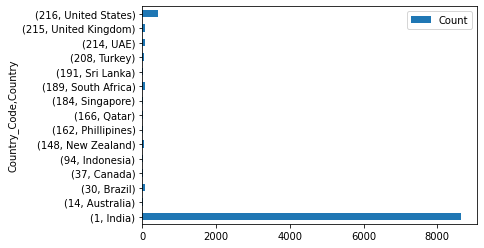

In [18]:
cntry_dist.plot(kind='barh')

In [19]:
city_dist = df_rest.groupby(['Country','City']).agg(Count = ('Restaurant_ID','count'))
city_dist.describe()
#city with max restaurant has count = 5473
#city with min restaurant has count = 1

,Count
count,141.000000
mean,67.730496
std,476.723952
min,1.000000
25%,1.000000
50%,20.000000
75%,20.000000
max,5473.000000


In [20]:
city_dist.sort_values(by='Count',ascending=False)
# we see that new Delhi has the maximum restaurant with 5473
# we observe that multiple cities have only one restaurant.

Count
Country       City                 
India         New Delhi        5473
              Gurgaon          1118
              Noida            1080
              Faridabad         251
              Ghaziabad          25
...                             ...
              Panchkula           1
Australia     Balingup            1
Indonesia     Bandung             1
Phillipines   Quezon City         1
United States Winchester Bay      1

[141 rows x 1 columns]

In [21]:
min_cnt_rest = city_dist[city_dist['Count']==1]
min_cnt_rest.info()
min_cnt_rest
#There are 46 cities in 7 different countries with 1 restaurants

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 46 entries, ('Australia', 'Armidale') to ('United States', 'Winchester Bay')
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Count   46 non-null     int64
dtypes: int64(1)
memory usage: 1.8+ KB


Count
Country       City                   
Australia     Armidale              1
              Balingup              1
              Beechworth            1
              Dicky Beach           1
              East Ballina          1
              Flaxton               1
              Forrest               1
              Huskisson             1
              Inverloch             1
              Lakes Entrance        1
              Lorn                  1
              Macedon               1
              Mayfield              1
              Middleton Beach       1
              Montville             1
              Palm Cove             1
              Paynesville           1
              Penola                1
              Phillip Island        1
              Tanunda               1
              Trentham East         1
              Victor Harbor         1
Canada        Chatham-Kent          1
              Consort               1
              Vineland Station      1
              Yorkton               1
India         Mohali                1
              Panchkula             1
Indonesia     Bandung               1
Phillipines   Quezon City           1
              Tagaytay City         1
South Africa  Randburg              1
United States Clatskanie            1
              Cochrane              1
              Fernley               1
              Lakeview              1
              Lincoln               1
              Mc Millan             1
              Miller                1
              Monroe                1
              Ojo Caliente          1
              Potrero               1
              Princeton             1
              Vernonia              1
              Weirton               1
              Winchester Bay        1

In [22]:
franch_dist = df_rest.groupby(['Restaurant_Name','Country']).agg(Count = ('Country','count'))
franch_dist.describe()

,Count
count,7472.000000
mean,1.278105
std,2.165675
min,1.000000
25%,1.000000
50%,1.000000
75%,1.000000
max,83.000000


In [23]:
franch_dist.sort_values(by='Count',ascending=False)
#cafe Coffe day has most national prsesence

,,Count
Restaurant_Name,Country,
Cafe Coffee Day,India,83
Domino's Pizza,India,79
Subway,India,63
Green Chick Chop,India,51
McDonald's,India,48
...,...,...
Gibson's Gourmet Burgers & Ribs,South Africa,1
Giapo,New Zealand,1
Giani's di Hatti,India,1


In [24]:
df_rest1 = df_rest.copy()
df_rest1.columns

Index(['Restaurant_ID', 'Restaurant_Name', 'Country_Code', 'City', 'Address',
       'Locality', 'Locality_Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average_Cost_for_two', 'Currency', 'Has_Table_booking',
       'Has_Online_delivery', 'Price_range', 'Aggregate_rating',
       'Rating_color', 'Rating_text', 'Votes', 'Country'],
      dtype='object')

In [25]:
dummy = ['Has_Table_booking','Has_Online_delivery']
df_rest1 = pd.get_dummies(df_rest1,columns=dummy,drop_first=True)
df_rest1.head()
# 0 indicates 'NO'
# 1 indicates 'YES'

,Restaurant_ID,Restaurant_Name,Country_Code,City,Address,Locality,Locality_Verbose,Longitude,Latitude,Cuisines,Average_Cost_for_two,Currency,Price_range,Aggregate_rating,Rating_color,Rating_text,Votes,Country,Has_Table_booking_Yes,Has_Online_delivery_Yes
0,7402935,Skye,94,Jakarta,"Menara BCA, Lantai 56, Jl. MH. Thamrin, Thamri...","Grand Indonesia Mall, Thamrin","Grand Indonesia Mall, Thamrin, Jakarta",106.821999,-6.196778,"Italian, Continental",800000,Indonesian Rupiah(IDR),3,4.1,Green,Very Good,1498,Indonesia,0,0
1,7410290,Satoo - Hotel Shangri-La,94,Jakarta,"Hotel Shangri-La, Jl. Jend. Sudirman","Hotel Shangri-La, Sudirman","Hotel Shangri-La, Sudirman, Jakarta",106.818961,-6.203292,"Asian, Indonesian, Western",800000,Indonesian Rupiah(IDR),3,4.6,Dark Green,Excellent,873,Indonesia,0,0
2,7420899,Sushi Masa,94,Jakarta,"Jl. Tuna Raya No. 5, Penjaringan",Penjaringan,"Penjaringan, Jakarta",106.800144,-6.101298,"Sushi, Japanese",500000,Indonesian Rupiah(IDR),3,4.9,Dark Green,Excellent,605,Indonesia,0,0
3,7421967,3 Wise Monkeys,94,Jakarta,"Jl. Suryo No. 26, Senopati, Jakarta",Senopati,"Senopati, Jakarta",106.813400,-6.235241,Japanese,450000,Indonesian Rupiah(IDR),3,4.2,Green,Very Good,395,Indonesia,0,0
4,7422489,Avec Moi Restaurant and Bar,94,Jakarta,"Gedung PIC, Jl. Teluk Betung 43, Thamrin, Jakarta",Thamrin,"Thamrin, Jakarta",106.821023,-6.196270,"French, Western",350000,Indonesian Rupiah(IDR),3,4.3,Green,Very Good,243,Indonesia,0,0


In [26]:
#Ration between restaurants allowing table booking and those which dont
table_booking = df_rest1[df_rest1['Has_Table_booking_Yes']==1]['Restaurant_ID'].count()
table_nbooking =df_rest1[df_rest1['Has_Table_booking_Yes']==0]['Restaurant_ID'].count()
print('Ratio between restaurants that allow table booking vs. those that do not allow table booking: ',
      round((table_booking/table_nbooking),2))

Ratio between restaurants that allow table booking vs. those that do not allow table booking:  0.14


In [27]:
print(table_booking,table_nbooking)

1158 8392


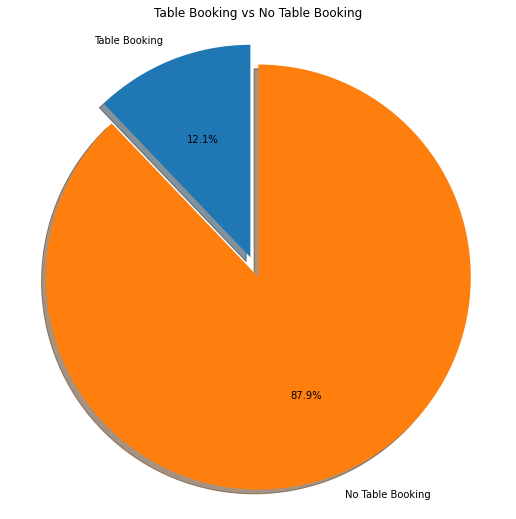

In [28]:
#Pie chart to show percentage of restaurants which allow table booking and those which don't
labels = 'Table Booking', 'No Table Booking'
sizes = [table_booking,table_nbooking]
explode = (0.1, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots(figsize=(9,9))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',shadow=True, startangle=90)
ax1.set_title("Table Booking vs No Table Booking")
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

In [29]:
#Percentage of restaurant that has online delivery
rest_od = df_rest1[df_rest1['Has_Online_delivery_Yes'] == 1]['Restaurant_ID'].count()
rest_nod = df_rest1[df_rest1['Has_Online_delivery_Yes'] == 0]['Restaurant_ID'].count()
print('Percentage of restaurants providing online delivery : {} %'.format((round(rest_od/len(df_rest1),3)*100)))

Percentage of restaurants providing online delivery : 25.7 %


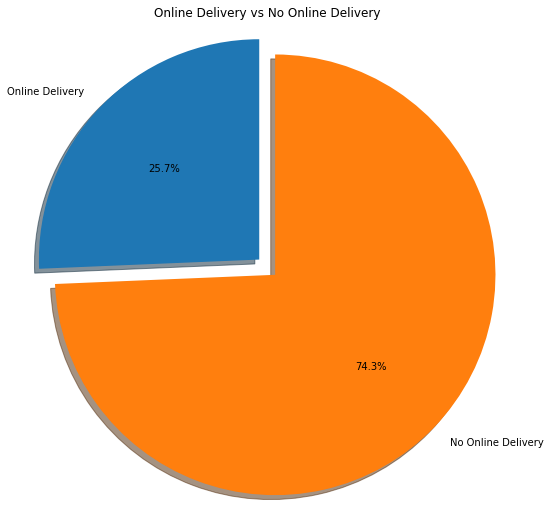

In [30]:
#pie chart to show percentages of restaurants allowing online delivery vs those which do not have online delivery
labels = 'Online Delivery','No Online Delivery'
size = [rest_od,rest_nod]
explode = (0.1,0)
fig1,ax1 = plt.subplots(figsize=(9,9))
ax1.pie(size,explode=explode,labels=labels,autopct='%1.1f%%',shadow=True,startangle=90)
ax1.set_title("Online Delivery vs No Online Delivery")
ax1.axis('equal')
plt.show()

In [37]:
rest_deliver = df_rest1[df_rest1['Has_Table_booking_Yes'] == 1]['Votes'].sum()
rest_ndeliver = df_rest1[df_rest1['Has_Table_booking_Yes'] == 0]['Votes'].sum()
print('Difference in number of votes for restaurants that deliver and dont deliver: ')

Difference in number of votes for restaurants that deliver and dont deliver: 


In [38]:
#What are the top 10 cuisines served across cities?
#Explore how ratings are distributed overall
#Evaluate the Highest Rated and Lowest Rated Restaurant of the City in all the countries
#What is the maximum and minimum no. of cuisines that a restaurant serves?

In [39]:
df_rest.columns
cuisines = df_rest['Cuisines'].apply(lambda x: pd.Series(x.split(',')))

In [40]:
cuisines.columns = ['Cuisine_1','Cuisine_2','Cuisine_3','Cuisine_4','Cuisine_5','Cuisine_6','Cuisine_7','Cuisine_8']
cuisines.tail()

,Cuisine_1,Cuisine_2,Cuisine_3,Cuisine_4,Cuisine_5,Cuisine_6,Cuisine_7,Cuisine_8
9545,Chinese,North Indian,Fast Food,NaN,NaN,NaN,NaN,NaN
9546,Indian,Chinese,Continental,NaN,NaN,NaN,NaN,NaN
9547,Cafe,Continental,Desserts,Ice Cream,Italian,Beverages,NaN,NaN
9548,Street Food,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9549,Chinese,North Indian,NaN,NaN,NaN,NaN,NaN,NaN


In [41]:
df_cuisines = pd.concat([df_rest,cuisines],axis=1)
df_cuisines.head()

,Restaurant_ID,Restaurant_Name,Country_Code,City,Address,Locality,Locality_Verbose,Longitude,Latitude,Cuisines,...,Votes,Country,Cuisine_1,Cuisine_2,Cuisine_3,Cuisine_4,Cuisine_5,Cuisine_6,Cuisine_7,Cuisine_8
0,7402935,Skye,94,Jakarta,"Menara BCA, Lantai 56, Jl. MH. Thamrin, Thamri...","Grand Indonesia Mall, Thamrin","Grand Indonesia Mall, Thamrin, Jakarta",106.821999,-6.196778,"Italian, Continental",...,1498,Indonesia,Italian,Continental,NaN,NaN,NaN,NaN,NaN,NaN
1,7410290,Satoo - Hotel Shangri-La,94,Jakarta,"Hotel Shangri-La, Jl. Jend. Sudirman","Hotel Shangri-La, Sudirman","Hotel Shangri-La, Sudirman, Jakarta",106.818961,-6.203292,"Asian, Indonesian, Western",...,873,Indonesia,Asian,Indonesian,Western,NaN,NaN,NaN,NaN,NaN
2,7420899,Sushi Masa,94,Jakarta,"Jl. Tuna Raya No. 5, Penjaringan",Penjaringan,"Penjaringan, Jakarta",106.800144,-6.101298,"Sushi, Japanese",...,605,Indonesia,Sushi,Japanese,NaN,NaN,NaN,NaN,NaN,NaN
3,7421967,3 Wise Monkeys,94,Jakarta,"Jl. Suryo No. 26, Senopati, Jakarta",Senopati,"Senopati, Jakarta",106.813400,-6.235241,Japanese,...,395,Indonesia,Japanese,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,7422489,Avec Moi Restaurant and Bar,94,Jakarta,"Gedung PIC, Jl. Teluk Betung 43, Thamrin, Jakarta",Thamrin,"Thamrin, Jakarta",106.821023,-6.196270,"French, Western",...,243,Indonesia,French,Western,NaN,NaN,NaN,NaN,NaN,NaN


In [42]:
df_cuisines = pd.concat([df_rest,cuisines],axis=1)
df_cuisines.head()

,Restaurant_ID,Restaurant_Name,Country_Code,City,Address,Locality,Locality_Verbose,Longitude,Latitude,Cuisines,...,Votes,Country,Cuisine_1,Cuisine_2,Cuisine_3,Cuisine_4,Cuisine_5,Cuisine_6,Cuisine_7,Cuisine_8
0,7402935,Skye,94,Jakarta,"Menara BCA, Lantai 56, Jl. MH. Thamrin, Thamri...","Grand Indonesia Mall, Thamrin","Grand Indonesia Mall, Thamrin, Jakarta",106.821999,-6.196778,"Italian, Continental",...,1498,Indonesia,Italian,Continental,NaN,NaN,NaN,NaN,NaN,NaN
1,7410290,Satoo - Hotel Shangri-La,94,Jakarta,"Hotel Shangri-La, Jl. Jend. Sudirman","Hotel Shangri-La, Sudirman","Hotel Shangri-La, Sudirman, Jakarta",106.818961,-6.203292,"Asian, Indonesian, Western",...,873,Indonesia,Asian,Indonesian,Western,NaN,NaN,NaN,NaN,NaN
2,7420899,Sushi Masa,94,Jakarta,"Jl. Tuna Raya No. 5, Penjaringan",Penjaringan,"Penjaringan, Jakarta",106.800144,-6.101298,"Sushi, Japanese",...,605,Indonesia,Sushi,Japanese,NaN,NaN,NaN,NaN,NaN,NaN
3,7421967,3 Wise Monkeys,94,Jakarta,"Jl. Suryo No. 26, Senopati, Jakarta",Senopati,"Senopati, Jakarta",106.813400,-6.235241,Japanese,...,395,Indonesia,Japanese,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,7422489,Avec Moi Restaurant and Bar,94,Jakarta,"Gedung PIC, Jl. Teluk Betung 43, Thamrin, Jakarta",Thamrin,"Thamrin, Jakarta",106.821023,-6.196270,"French, Western",...,243,Indonesia,French,Western,NaN,NaN,NaN,NaN,NaN,NaN


In [43]:
cuisine_loc = pd.DataFrame(df_cuisines[['Country','City','Locality_Verbose','Cuisine_1','Cuisine_2','Cuisine_3',
                                        'Cuisine_4','Cuisine_5','Cuisine_6','Cuisine_7','Cuisine_8']])

In [44]:
cuisine_loc_stack=pd.DataFrame(cuisine_loc.stack()) #stacking the columns 
cuisine_loc.head()

,Country,City,Locality_Verbose,Cuisine_1,Cuisine_2,Cuisine_3,Cuisine_4,Cuisine_5,Cuisine_6,Cuisine_7,Cuisine_8
0,Indonesia,Jakarta,"Grand Indonesia Mall, Thamrin, Jakarta",Italian,Continental,NaN,NaN,NaN,NaN,NaN,NaN
1,Indonesia,Jakarta,"Hotel Shangri-La, Sudirman, Jakarta",Asian,Indonesian,Western,NaN,NaN,NaN,NaN,NaN
2,Indonesia,Jakarta,"Penjaringan, Jakarta",Sushi,Japanese,NaN,NaN,NaN,NaN,NaN,NaN
3,Indonesia,Jakarta,"Senopati, Jakarta",Japanese,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Indonesia,Jakarta,"Thamrin, Jakarta",French,Western,NaN,NaN,NaN,NaN,NaN,NaN


In [45]:
keys = [c for c in cuisine_loc  if c.startswith('Cuisine')]
a=pd.melt(cuisine_loc, id_vars='Locality_Verbose', value_vars=keys, value_name='Cuisines') 
#melting the stack into one row
max_rate=pd.DataFrame(a.groupby(by=['Locality_Verbose','variable','Cuisines']).size().reset_index())
#find the highest restuarant in the city
max_rate
del max_rate['variable']
max_rate.columns=['Locality_Verbose','Cuisines','Count']
max_rate.head()

,Locality_Verbose,Cuisines,Count
0,"ILD Trade Centre Mall, Sohna Road, Gurgaon",Cafe,1
1,"ILD Trade Centre Mall, Sohna Road, Gurgaon",North Indian,1
2,"ILD Trade Centre Mall, Sohna Road, Gurgaon",Beverages,1
3,"ILD Trade Centre Mall, Sohna Road, Gurgaon",Mughlai,1
4,"12th Square Building, Banjara Hills, Hyderabad",Mughlai,1


In [46]:
#find the highest restuarant in the city
loc=max_rate.sort_values('Count', ascending=False).groupby(by=['Locality_Verbose'],as_index=False).first()
loc.head()

,Locality_Verbose,Cuisines,Count
0,"ILD Trade Centre Mall, Sohna Road, Gurgaon",Cafe,1
1,"12th Square Building, Banjara Hills, Hyderabad",Mughlai,1
2,"A Hotel, Gurdev Nagar, Ludhiana",Chinese,1
3,"ARSS Mall, Paschim Vihar, New Delhi",North Indian,1
4,"Aaya Nagar, New Delhi",Cuisine Varies,1


In [47]:
rating_res=loc.merge(df_rest,left_on='Locality_Verbose',right_on='Locality_Verbose',how='inner') 
#inner join to merge the two dataframe
df=pd.DataFrame(rating_res[['Country','City','Locality_Verbose','Cuisines_x','Count']]) 
#making a dataframe of rating restaurant
country=rating_res.sort_values('Count', ascending=False).groupby(by=['Country'],as_index=False).first()
#grouping the data by country code
con=pd.DataFrame(country[['Country','City','Locality','Cuisines_x','Count']])
con.columns=['Country','City','Locality','Cuisines','Number of restaurants in the country']
#renaming the columns
con1=con.sort_values('Number of restaurants in the country', ascending=False) 
#sorting the restaurants on the basis of the number of restaurants in the country
con1[:10]
final_con=con1.drop(con1.index[[7,10]])

In [48]:
final_con

,Country,City,Locality,Cuisines,Number of restaurants in the country
3,India,New Delhi,Connaught Place,North Indian,48
14,United States,Dubuque,Dubuque,American,9
5,New Zealand,Wellington City,Te Aro,Cafe,5
1,Brazil,Rio de Janeiro,Ipanema,Brazilian,3
6,Phillipines,Mandaluyong City,"SM Megamall, Ortigas, Mandaluyong City",Japanese,2
8,Singapore,Singapore,"Marina Centre, Downtown Core",Seafood,2
9,South Africa,Cape Town,Green Point,Grill,2
11,Turkey,Ankara,Gazi Osman PaÅÙa,World Cuisine,2
12,UAE,Abu Dhabi,"Abu Dhabi Mall, Tourist Club Area (Al Zahiyah)",American,2
0,Australia,Victor Harbor,Victor Harbor,Coffee and Tea,1


In [49]:
rest_cuisine = pd.DataFrame(df_cuisines[['Restaurant_Name','City','Cuisine_1','Cuisine_2','Cuisine_3','Cuisine_4',
                                         'Cuisine_5','Cuisine_6','Cuisine_7','Cuisine_8']])
rest_cuisine_stack=pd.DataFrame(rest_cuisine.stack()) #stacking the columns 
rest_cuisine.head()

,Restaurant_Name,City,Cuisine_1,Cuisine_2,Cuisine_3,Cuisine_4,Cuisine_5,Cuisine_6,Cuisine_7,Cuisine_8
0,Skye,Jakarta,Italian,Continental,NaN,NaN,NaN,NaN,NaN,NaN
1,Satoo - Hotel Shangri-La,Jakarta,Asian,Indonesian,Western,NaN,NaN,NaN,NaN,NaN
2,Sushi Masa,Jakarta,Sushi,Japanese,NaN,NaN,NaN,NaN,NaN,NaN
3,3 Wise Monkeys,Jakarta,Japanese,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Avec Moi Restaurant and Bar,Jakarta,French,Western,NaN,NaN,NaN,NaN,NaN,NaN


In [50]:
keys1 = [c for c in rest_cuisine  if c.startswith('Cuisine')]
b=pd.melt(rest_cuisine, id_vars='Restaurant_Name', value_vars=keys, value_name='Cuisines') 
#melting the stack into one row
max_rate1=pd.DataFrame(b.groupby(by=['Restaurant_Name','variable','Cuisines']).size().reset_index()) 
#find the highest restuarant in the city
max_rate1
del max_rate1['variable']
max_rate1.columns=['Restaurant_Name','Cuisines','Count']
max_rate1.head(20)

,Restaurant_Name,Cuisines,Count
0,12212,Fast Food,1
1,Let's Burrrp,Chinese,1
2,Let's Burrrp,North Indian,1
3,#45,Cafe,1
4,#Dilliwaala6,North Indian,1
5,#InstaFreeze,Ice Cream,1
6,#OFF Campus,Cafe,1
7,#OFF Campus,Continental,1
8,#OFF Campus,Italian,1
9,#OFF Campus,Fast Food,1


In [51]:
max_rate1.sort_values('Count',ascending=False)
#Cafe Coffee Day has the max number of cuisines and The least number of cuisines in a resaurant is 1.

,Restaurant_Name,Cuisines,Count
2479,Cafe Coffee Day,Cafe,83
4596,Domino's Pizza,Pizza,79
4597,Domino's Pizza,Fast Food,78
12984,Subway,Salad,63
12985,Subway,Healthy Food,63
...,...,...,...
5568,Gabbar's Bar & Kitchen,Chinese,1
5569,Gabbar's Bar & Kitchen,Mexican,1
5570,Gabbar's Bar & Kitchen,Italian,1
5571,Gaga Manjero,World Cuisine,1


In [59]:
rating = df_rest1[['Restaurant_ID','Restaurant_Name','Country','City','Aggregate_rating','Average_Cost_for_two','Votes','Price_range']]

In [60]:
rating = rating.merge(max_rate1,left_on='Restaurant_Name',right_on='Restaurant_Name',how='left')
rating

,Restaurant_ID,Restaurant_Name,Country,City,Aggregate_rating,Average_Cost_for_two,Votes,Price_range,Cuisines,Count
0,7402935,Skye,Indonesia,Jakarta,4.1,800000,1498,3,Italian,1
1,7402935,Skye,Indonesia,Jakarta,4.1,800000,1498,3,Continental,1
2,7410290,Satoo - Hotel Shangri-La,Indonesia,Jakarta,4.6,800000,873,3,Asian,1
3,7410290,Satoo - Hotel Shangri-La,Indonesia,Jakarta,4.6,800000,873,3,Indonesian,1
4,7410290,Satoo - Hotel Shangri-La,Indonesia,Jakarta,4.6,800000,873,3,Western,1
...,...,...,...,...,...,...,...,...,...,...
23810,18312106,UrbanCrave,India,Kanpur,3.9,0,127,1,Italian,1
23811,18312106,UrbanCrave,India,Kanpur,3.9,0,127,1,Beverages,1
23812,3900245,Deena Chat Bhandar,India,Varanasi,3.8,0,78,1,Street Food,1
23813,18246202,VNS Live Studio,India,Varanasi,3.5,0,109,1,Chinese,1


,Count,Aggregate_rating
Count,1.000000,-0.001642
Aggregate_rating,-0.001642,1.000000


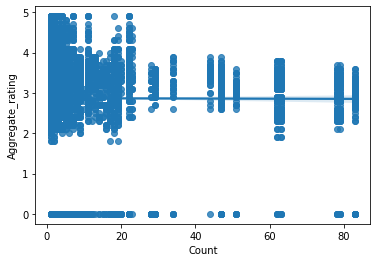

In [61]:
sns.regplot(x='Count',y='Aggregate_rating',data=rating)
rating[["Count", "Aggregate_rating"]].corr()
#Number of cuisines is not a good factor to decide the rating of a restaurant

,Average_Cost_for_two,Aggregate_rating
Average_Cost_for_two,1.00000,0.05011
Aggregate_rating,0.05011,1.00000


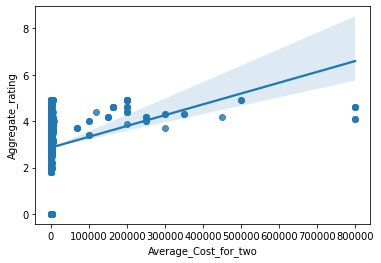

In [62]:
sns.regplot(x='Average_Cost_for_two',y='Aggregate_rating',data=rating)
rating[["Average_Cost_for_two", "Aggregate_rating"]].corr()
#Average cost for two is a weak positive factor to decide the rating of a restaurant

,Votes,Aggregate_rating
Votes,1.000000,0.318667
Aggregate_rating,0.318667,1.000000


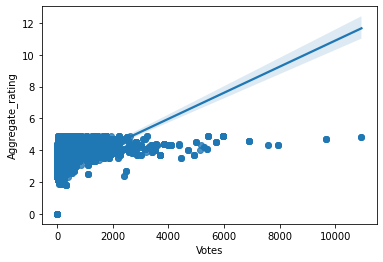

In [63]:
sns.regplot(x='Votes',y='Aggregate_rating',data=rating)
rating[['Votes','Aggregate_rating']].corr()
##Average cost for two can be a factor to decide the rating of a restaurant

,Price_range,Aggregate_rating
Price_range,1.000000,0.462983
Aggregate_rating,0.462983,1.000000


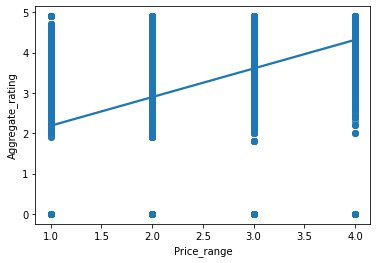

In [64]:
abc = df_rest1[df_rest1['Has_Online_delivery_Yes'] == 1]['Aggregate_rating'].mean()
xyz = df_rest1[df_rest1['Has_Online_delivery_Yes'] == 0]['Aggregate_rating'].mean()
sns.regplot(x='Price_range',y='Aggregate_rating',data=rating)
rating[['Price_range','Aggregate_rating']].corr()
##Price range can be a factor to decide the rating of a restaurant

In [69]:
sns.regplot(x='Has_Table_booking_Yes',y='Aggregate_rating',data=rating)
rating[['Has_Table_booking_Yes','Aggregate_rating']].corr()
##Table booking can be a factor to decide the rating of a restaurant

KeyError: 'Has_Table_booking_Yes'

In [70]:
max_rate = df_rest.sort_values(by='Aggregate_rating',ascending=False).groupby(['Country','City'],as_index=False).first()
#highest rating restaurants

min_rate = df_rest.sort_values(by='Aggregate_rating',ascending=False).groupby(['Country','City'],as_index=False).last()
#lowest rating restaurants

df_max=max_rate[['Country','City','Restaurant_Name','Aggregate_rating']] #new dataframe created for high rated restaurants

df_min=min_rate[['Country','City','Restaurant_Name','Aggregate_rating']] #new dataframe created for low rated restaurants

rating_rest=df_max.merge(df_min,left_on='City',right_on='City',how='inner') #merge into single dataframe

In [71]:
rating_rest

,Country_x,City,Restaurant_Name_x,Aggregate_rating_x,Country_y,Restaurant_Name_y,Aggregate_rating_y
0,Australia,Armidale,Whitebull Hotel,3.5,Australia,Whitebull Hotel,3.5
1,Australia,Balingup,Taste of Balingup,3.2,Australia,Taste of Balingup,3.2
2,Australia,Beechworth,Bridge Road Brewers,4.6,Australia,Bridge Road Brewers,4.6
3,Australia,Dicky Beach,The Giggling Goat,3.6,Australia,The Giggling Goat,3.6
4,Australia,East Ballina,The Belle General,4.1,Australia,The Belle General,4.1
...,...,...,...,...,...,...,...
136,United States,Valdosta,Smok'n Pig B-B-Q,4.1,United States,El Toreo Mexican Restaurant,3.1
137,United States,Vernonia,Blue House Cafe,4.3,United States,Blue House Cafe,4.3
138,United States,Waterloo,Four Queens Dairy Cream,3.9,United States,Masala Grill & Coffee House,3.2
139,United States,Weirton,Theo Yianni's Authentic Greek Restaurant,3.9,United States,Theo Yianni's Authentic Greek Restaurant,3.9


In [72]:
rating_rest.drop(columns='Country_y',axis=1,inplace=True)
rating_rest.columns = ['Country','City','Highest Rated Restaurant','Rating Max','Lowest Rated Restaurant','Rating Min']
rating_rest

,Country,City,Highest Rated Restaurant,Rating Max,Lowest Rated Restaurant,Rating Min
0,Australia,Armidale,Whitebull Hotel,3.5,Whitebull Hotel,3.5
1,Australia,Balingup,Taste of Balingup,3.2,Taste of Balingup,3.2
2,Australia,Beechworth,Bridge Road Brewers,4.6,Bridge Road Brewers,4.6
3,Australia,Dicky Beach,The Giggling Goat,3.6,The Giggling Goat,3.6
4,Australia,East Ballina,The Belle General,4.1,The Belle General,4.1
...,...,...,...,...,...,...
136,United States,Valdosta,Smok'n Pig B-B-Q,4.1,El Toreo Mexican Restaurant,3.1
137,United States,Vernonia,Blue House Cafe,4.3,Blue House Cafe,4.3
138,United States,Waterloo,Four Queens Dairy Cream,3.9,Masala Grill & Coffee House,3.2
139,United States,Weirton,Theo Yianni's Authentic Greek Restaurant,3.9,Theo Yianni's Authentic Greek Restaurant,3.9


In [73]:
rating_rest_city_india=rating_rest[rating_rest['Country']=='India'] #storing the dataframe only for country 'India'
rating_rest_city_india #In India
city=rating_rest_city_india['City'].tolist()#converting the series to list 
rate_max=rating_rest_city_india['Rating Max'].tolist()#converting the series to list
rate_min=rating_rest_city_india['Rating Min'].tolist()#converting the series to list
rest_name_high=rating_rest_city_india['Highest Rated Restaurant'].tolist()#converting the series to list
rest_name_low=rating_rest_city_india['Lowest Rated Restaurant'].tolist()

In [74]:
stack0 = go.Bar( # GroupBarChart 1 (Highest Rated Resturant)
    x=city,#x axis label
    y=rate_max,# y axis label
    text=rest_name_high,# the value of the restaurant
    name='Highest Rated Restaurant',
     marker=dict(
        color='rgb(76,153,0)', #color of the bar graph's marker
        line=dict(
            color='rgb(76,153,0)', #color of the bar graph's line
            width=1.5, #width of the bar graph
        )
    ),
    opacity=1.0
)
stack1 = go.Bar( # GroupBarChart 2 (Lowest Rated Resturant)
    x=city,
    y=rate_min,
    text=rest_name_low,
    name='Lowest Rated Restaurant',
     marker=dict(
        color='rgb(255,0,0)',#color of the bar graph's marker
        line=dict(
            color='rgb(255,0,0)',#color of the bar graph's line
            width=1.5, #width of the bar graph
        )
    ),
    opacity=1.0
)
data = [stack0,stack1]
layout = go.Layout(
    legend=dict( #the layout of the graph( beautification)
        x=0,
        y=1,
        traceorder='normal',
        font=dict(
            family='sans-serif',
            size=12,
            color='#000'
        ),
        bgcolor='#E2E2E2',
        bordercolor='#FFFFFF',
        borderwidth=2
    ),
    autosize=False,
    width=1000, # size of the graph
    height=450,
    barmode='group',
    title="Graph 1.1: Restaurants rating of India <br>\
    <i>hover with cursor to see restaurant's name</i>", #title of the graph
    plot_bgcolor='rgba(245, 246, 249, 1)',
    xaxis=dict(tickangle=-45,title= 'City of India'), #making the graphs label inclined at 45 deg
    yaxis= {'title': 'Rating(scale of 5)'} #label of y-axis
)
fig = go.Figure(data=data, layout=layout) #plotting the graph
iplot(fig, filename='style-barbar')

NameError: name 'go' is not defined

In [75]:
stack0 = go.Bar( # GroupBarChart 1 (Highest Rated Resturant)
    x=cityu,#x axis label
    y=rate_maxu,# y axis label
    text=rest_name_highu,# the value of the restaurant
    name='Highest Rated Restaurant',
     marker=dict(
        color='rgb(76,153,0)', #color of the bar graph's marker
        line=dict(
            color='rgb(76,153,0)', #color of the bar graph's line
            width=1.5, #width of the bar graph
        )
    ),
    opacity=1.0
)
stack1 = go.Bar( # GroupBarChart 2 (Lowest Rated Resturant)
    x=cityu,
    y=rate_minu,
    text=rest_name_lowu,
    name='Lowest Rated Restaurant',
     marker=dict(
        color='rgb(255,0,0)',#color of the bar graph's marker
        line=dict(
            color='rgb(255,0,0)',#color of the bar graph's line
            width=1.5, #width of the bar graph
        )
    ),
    opacity=1.0
)
data = [stack0,stack1]
layout = go.Layout(
    legend=dict( #the layout of the graph( beautification)
        x=0,
        y=1,
        traceorder='normal',
        font=dict(
            family='sans-serif',
            size=12,
            color='#000'
        ),
        bgcolor='#E2E2E2',
        bordercolor='#FFFFFF',
        borderwidth=2
    ),
    autosize=False,
    width=1000, # size of the graph
    height=450,
    barmode='group',
    title="Graph 1.1: Restaurants rating of USA <br>\
    <i>hover with cursor to see restaurant's name</i>", #title of the graph
    plot_bgcolor='rgba(245, 246, 249, 1)',
    xaxis=dict(tickangle=-45,title= 'City of USA'), #making the graphs label inclined at 45 deg
    yaxis= {'title': 'Rating(scale of 5)'} #label of y-axis
)
fig = go.Figure(data=data, layout=layout) #plotting the graph
iplot(fig, filename='style-barbar')

NameError: name 'go' is not defined

In [76]:
df_rest1 = df_rest.copy()
df_rest1.columns

Index(['Restaurant_ID', 'Restaurant_Name', 'Country_Code', 'City', 'Address',
       'Locality', 'Locality_Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average_Cost_for_two', 'Currency', 'Has_Table_booking',
       'Has_Online_delivery', 'Price_range', 'Aggregate_rating',
       'Rating_color', 'Rating_text', 'Votes', 'Country'],
      dtype='object')

In [77]:
dummy = ['Has_Table_booking','Has_Online_delivery']
df_rest1 = pd.get_dummies(df_rest1,columns=dummy,drop_first=True)
df_rest1.head()
# 0 indicates 'NO'
# 1 indicates 'YES'

,Restaurant_ID,Restaurant_Name,Country_Code,City,Address,Locality,Locality_Verbose,Longitude,Latitude,Cuisines,Average_Cost_for_two,Currency,Price_range,Aggregate_rating,Rating_color,Rating_text,Votes,Country,Has_Table_booking_Yes,Has_Online_delivery_Yes
0,7402935,Skye,94,Jakarta,"Menara BCA, Lantai 56, Jl. MH. Thamrin, Thamri...","Grand Indonesia Mall, Thamrin","Grand Indonesia Mall, Thamrin, Jakarta",106.821999,-6.196778,"Italian, Continental",800000,Indonesian Rupiah(IDR),3,4.1,Green,Very Good,1498,Indonesia,0,0
1,7410290,Satoo - Hotel Shangri-La,94,Jakarta,"Hotel Shangri-La, Jl. Jend. Sudirman","Hotel Shangri-La, Sudirman","Hotel Shangri-La, Sudirman, Jakarta",106.818961,-6.203292,"Asian, Indonesian, Western",800000,Indonesian Rupiah(IDR),3,4.6,Dark Green,Excellent,873,Indonesia,0,0
2,7420899,Sushi Masa,94,Jakarta,"Jl. Tuna Raya No. 5, Penjaringan",Penjaringan,"Penjaringan, Jakarta",106.800144,-6.101298,"Sushi, Japanese",500000,Indonesian Rupiah(IDR),3,4.9,Dark Green,Excellent,605,Indonesia,0,0
3,7421967,3 Wise Monkeys,94,Jakarta,"Jl. Suryo No. 26, Senopati, Jakarta",Senopati,"Senopati, Jakarta",106.813400,-6.235241,Japanese,450000,Indonesian Rupiah(IDR),3,4.2,Green,Very Good,395,Indonesia,0,0
4,7422489,Avec Moi Restaurant and Bar,94,Jakarta,"Gedung PIC, Jl. Teluk Betung 43, Thamrin, Jakarta",Thamrin,"Thamrin, Jakarta",106.821023,-6.196270,"French, Western",350000,Indonesian Rupiah(IDR),3,4.3,Green,Very Good,243,Indonesia,0,0
